Objetivo: demonstrar a variação do número de casos da dengue no primeiro semestre de 2022 em comparação com o mesmo período do ano anterior.

Problema de Pesquisa: Tendo em vista os Boletins Epidemiológicos disponibilizados pela Secretaria de Saúde do Distrito Federal (SES),  qual foi a variação no número de casos de dengue durante o primeiro semestre de 2022 em comparação com o mesmo período de 2021, no Distrito Federal (DF)?

Esse trabalho usa como base para a análise, o Boletim Epidemiológico Nº 23 de 2021, que corresponde às informações coletadas do dia 03/01/2021 a 12/06/2021, e o Boletim Epidemiológico Nº 24 de 2022, que corresponde às informações coletadas do dia 02/01/2022 a 18/06/2022. 

Boletim Nº 23: https://www.saude.df.gov.br/documents/37101/898992/23_BOLETIM_SEMANAL_DENGUE_SE_01-a-23-1.pdf

Boletim Nº 24: https://www.saude.df.gov.br/documents/37101/0/24_BOLETIM_SEMANAL_DENGUE_SE_01+a+24_.pdf/d5c2d486-43b8-94c7-1a99-d84c58468bca?t=1656718450906

Esses boletins foram escolhidos a fim de se observar o mesmo período de um ano com o outro.

Ambos estão disponíveis no site da Secretaria de Saúde do Distrito Federal (SES): https://www.saude.df.gov.br/informes-dengue-chikungunya-zika-febre-amarela.

# Casos/RA e Região

Nesta primeira Seção, vamos analizar o número de casos identificados em cada Região Administrativa, tanto em 2021 quanto em 2022, durante o primeiro semestre.

In [1]:
import pandas as pd
import statistics
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving TRAB.CD_EXCEL.xlsx to TRAB.CD_EXCEL.xlsx
User uploaded file "TRAB.CD_EXCEL.xlsx" with length 17935 bytes


In [5]:
dengue_RA = pd.read_excel('TRAB.CD_EXCEL.xlsx')
dengue_RA

#Em razão de ainda ter o censo para um número exato da população das RAs, foi usado para análise a população estimada disponibilizada pelo IBGE para o ano de 2022.

,Unnamed: 0,2021.0,2022.0,POPULAÇÃO 2021,POPULAÇÃO ESTIMADA 2022
0,CENTRAL,711.0,2216.0,388012,-
1,Cruzeiro,24.0,294.0,30860,-
2,Lago Norte,189.0,341.0,37539,-
3,Lago Sul,72.0,360.0,30446,-
4,Plano Piloto,350.0,1032.0,224848,-
5,Sudoeste Octogonal,48.0,108.0,55366,-
6,Varjão,28.0,81.0,8953,-
7,CENTRO-SUL,571.0,3400.0,369785,-
8,Candangolândia,23.0,214.0,16339,-
9,Estrutural,131.0,500.0,45000,-


In [24]:
indice = 3094325/2878092
indice

1.0751306768511917

In [20]:
dengue_RA["POPULAÇÃO ESTIMADA 2022"]

0             -
1             -
2             -
3             -
4             -
5             -
6             -
7             -
8             -
9             -
10            -
11            -
12            -
13            -
14            -
15            -
16            -
17            -
18            -
19            -
20            -
21            -
22            -
23            -
24            -
25            -
26            -
27            -
28            -
29            -
30            -
31            -
32            -
33            -
34            -
35            -
36            -
37            -
38    3094325.0
Name: POPULAÇÃO ESTIMADA 2022, dtype: object

In [21]:
dengue_RA["POPULAÇÃO ESTIMADA 2022"] = dengue_RA["POPULAÇÃO 2021"]*indice

In [22]:
dengue_RA

,Unnamed: 0,2021.0,2022.0,POPULAÇÃO 2021,POPULAÇÃO ESTIMADA 2022
0,CENTRAL,711.0,2216.0,388012,4.171636e+05
1,Cruzeiro,24.0,294.0,30860,3.317853e+04
2,Lago Norte,189.0,341.0,37539,4.035933e+04
3,Lago Sul,72.0,360.0,30446,3.273343e+04
4,Plano Piloto,350.0,1032.0,224848,2.417410e+05
5,Sudoeste Octogonal,48.0,108.0,55366,5.952569e+04
6,Varjão,28.0,81.0,8953,9.625645e+03
7,CENTRO-SUL,571.0,3400.0,369785,3.975672e+05
8,Candangolândia,23.0,214.0,16339,1.756656e+04
9,Estrutural,131.0,500.0,45000,4.838088e+04


In [26]:
dengue_RA[2021.0]/dengue_RA["POPULAÇÃO 2021"]

0     0.001832
1     0.000778
2     0.005035
3     0.002365
4     0.001557
5     0.000867
6     0.003127
7     0.001544
8     0.001408
9     0.002911
10    0.001745
11    0.001453
12    0.000737
13    0.001147
14    0.000781
15    0.005181
16    0.004430
17    0.001433
18    0.004467
19    0.006284
20    0.004657
21    0.010742
22    0.002769
23    0.011727
24    0.012568
25    0.007661
26    0.002329
27    0.001664
28    0.002435
29    0.001516
30    0.001515
31    0.001385
32    0.001656
33    0.001240
34    0.002037
35    0.000861
36    0.000837
37    0.000886
38    0.003169
dtype: float64

In [27]:
dengue_RA["PER CAPITAL 2021"] = dengue_RA[2021.0]/dengue_RA["POPULAÇÃO 2021"]

In [31]:
dengue_RA[2022.0]/dengue_RA["POPULAÇÃO ESTIMADA 2022"]

0     0.005312
1     0.008861
2     0.008449
3     0.010998
4     0.004269
5     0.001814
6     0.008415
7     0.008552
8     0.012182
9     0.010335
10    0.009662
11    0.007335
12    0.005279
13    0.007928
14    0.006435
15    0.002677
16    0.015587
17    0.006155
18    0.007327
19    0.016909
20    0.023556
21    0.018263
22    0.011592
23    0.016453
24    0.021670
25    0.020163
26    0.025859
27    0.020008
28    0.026793
29    0.016108
30    0.009494
31    0.013649
32    0.019306
33    0.014789
34    0.023857
35    0.004448
36    0.005174
37    0.003686
38    0.018296
dtype: float64

In [32]:
dengue_RA["PER CAPITAL 2022"] = dengue_RA[2022.0]/dengue_RA["POPULAÇÃO ESTIMADA 2022"]

In [33]:
dengue_RA

,Unnamed: 0,2021.0,2022.0,POPULAÇÃO 2021,POPULAÇÃO ESTIMADA 2022,PER CAPITAL 2021,PER CAPITAL 2022
0,CENTRAL,711.0,2216.0,388012,4.171636e+05,0.001832,0.005312
1,Cruzeiro,24.0,294.0,30860,3.317853e+04,0.000778,0.008861
2,Lago Norte,189.0,341.0,37539,4.035933e+04,0.005035,0.008449
3,Lago Sul,72.0,360.0,30446,3.273343e+04,0.002365,0.010998
4,Plano Piloto,350.0,1032.0,224848,2.417410e+05,0.001557,0.004269
5,Sudoeste Octogonal,48.0,108.0,55366,5.952569e+04,0.000867,0.001814
6,Varjão,28.0,81.0,8953,9.625645e+03,0.003127,0.008415
7,CENTRO-SUL,571.0,3400.0,369785,3.975672e+05,0.001544,0.008552
8,Candangolândia,23.0,214.0,16339,1.756656e+04,0.001408,0.012182
9,Estrutural,131.0,500.0,45000,4.838088e+04,0.002911,0.010335


In [35]:
Regiao = ['Central', 'Centro-Sul', 'Leste', 'Norte', 'Oeste', 'Sudoeste', 'Sul']
Per_Capita_2021 = [0.001832, 0.001544, 0.004430, 0.010742, 0.002329, 0.001516	, 0.000861]
Per_Capita_2022 = [0.005312, 0.008552, 0.015587, 0.018263, 0.025859, 0.016108, 0.004448]

In [36]:
grafico = px.bar(dengue_RA, x=Regiao, y=Per_Capita_2021)
grafico.show ()

In [37]:
grafico = px.bar(dengue_RA, x=Regiao, y=Per_Capita_2022)
grafico.show ()

In [6]:
Regiao = ['Central', 'Centro-Sul', 'Leste', 'Norte', 'Oeste', 'Sudoeste', 'Sul']
Ano_2021 = [711, 571, 1361, 3740, 946, 1198, 231]
Ano_2022 = [2216, 3400, 5149, 6836, 11294, 13688, 1283]

Como se observa no gráfico a seguir, em 2021 a região que apresentou o maior número de casos foi a Norte, que corresponde às RAs: Fercal, Planaltina, Sobradinho e Sobradinho II.


In [7]:
grafico = px.bar(dengue_RA, x=Regiao, y=Ano_2021)
grafico.show ()

Da mesma forma, observa-se no gráfico a seguir que em 2022 a região que apresentou o maior número de casos foi o Sudoeste, que corresponde às RAs: Águas Claras, Recanto Das Emas, Samambaia, Taguatinga e Vicente Pires.

Ao se comparar ambos os gráficos, é possível observar que o aumento ocorreu em todas as regiões.

In [8]:
grafico = px.bar(dengue_RA, x=Regiao, y=Ano_2022)
grafico.show ()

O gráfico abaixo deixa mais claro o aumento dos casos em cada região:

Text(0.5, 1.0, 'Casos de Dengue por Região - 1º semestre de 2021 X 2022')

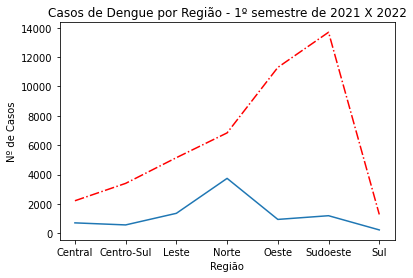

In [9]:
plt.plot(Regiao,Ano_2021,Ano_2022,"r-.")
plt.xlabel('Região')
plt.ylabel('Nº de Casos')
plt.title('Casos de Dengue por Região - 1º semestre de 2021 X 2022')

#Cepa predominante

Nesta segunda Seção será apresentado de forma complementar qual a cepa predominante, pois é válido ressaltar que a dengue é um vírus que possui 4 cepas diferentes, a DENV-1, DENV-2, DENV-3 e DENV-4. 

In [10]:
import matplotlib.pyplot as plt
import matplotlib.pyplot
import pandas as pd
import math as mt

A tabela a seguir nos traz informações acerca da cepa mais circulante em cada região de residência do DF, tanto do primeiro semestre de 2021 quanto de 2022.

Essas informações também foram retiradas dos Boletins mencionados anteriormente.


In [11]:
cepa_regiao_21 = pd.DataFrame({'Região' : ["Central", "Centro-Sul", "Leste", "Norte", "Oeste", "Sudoeste", "Sul"],
                   'DENV-1' : [5,0,16,27,7,3,2],
                   'DENV-2' : [0,0,0,0,0,0,0],
                   'DENV-3': [0,0,0,0,0,0,0],
                   'DENV-4': [0,0,0,0,0,0,0]})
cepa_regiao_21

,Região,DENV-1,DENV-2,DENV-3,DENV-4
0,Central,5,0,0,0
1,Centro-Sul,0,0,0,0
2,Leste,16,0,0,0
3,Norte,27,0,0,0
4,Oeste,7,0,0,0
5,Sudoeste,3,0,0,0
6,Sul,2,0,0,0


Text(0.5, 1.0, 'Cepa predominante - 2021')

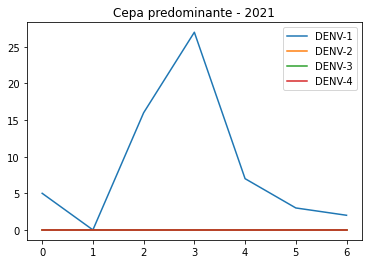

In [12]:
cepa_regiao_21.plot()
plt.title('Cepa predominante - 2021')

In [13]:
cepa_regiao_22 = pd.DataFrame({'Região' : ["Central", "Centro-Sul", "Leste", "Norte", "Oeste", "Sudoeste", "Sul"],
                   'DENV-1' : [70,31,28,20,986,177,51],
                   'DENV-2' : [0,0,0,0,0,0,0],
                   'DENV-3': [0,0,0,0,0,0,0],
                   'DENV-4': [0,0,0,0,0,0,0]})
cepa_regiao_22

,Região,DENV-1,DENV-2,DENV-3,DENV-4
0,Central,70,0,0,0
1,Centro-Sul,31,0,0,0
2,Leste,28,0,0,0
3,Norte,20,0,0,0
4,Oeste,986,0,0,0
5,Sudoeste,177,0,0,0
6,Sul,51,0,0,0


Text(0.5, 1.0, 'Cepa predominante - 2022')

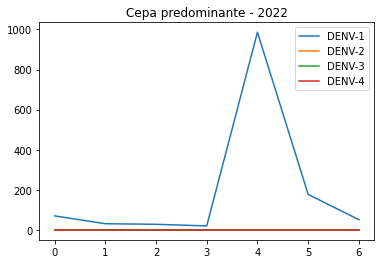

In [14]:
cepa_regiao_22.plot()
plt.title('Cepa predominante - 2022')

Ao analizar ambas as tabelas, observa-se nítidamente o aumento exponencial que houve no período de 2022 em comparação ao mesmo período de 2021 da cepa DENV-1:

In [15]:
print('O número total de casos da DENV-1 no primeiro semestre de 2021, ao se analisar 60 amostras, foram de', cepa_regiao_21["DENV-1"].sum(), 'casos, enquanto que em 2022, ao se analisar 1363 amostras, foram', cepa_regiao_22["DENV-1"].sum(), 'casos.')

O número total de casos da DENV-1 no primeiro semestre de 2021, ao se analisar 60 amostras, foram de 60 casos, enquanto que em 2022, ao se analisar 1363 amostras, foram 1363 casos.


Para se analizar mais profundamente, segue uma tabela com dados estatísticos mais específicos de ambas as tabelas.

Como se observa, os valores de 2022 são maiores que os valores de 2021.

In [16]:
cepa_regiao_21.describe()

,DENV-1,DENV-2,DENV-3,DENV-4
count,7.000000,7.0,7.0,7.0
mean,8.571429,0.0,0.0,0.0
std,9.641182,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0
25%,2.500000,0.0,0.0,0.0
50%,5.000000,0.0,0.0,0.0
75%,11.500000,0.0,0.0,0.0
max,27.000000,0.0,0.0,0.0


In [17]:
cepa_regiao_22.describe()

,DENV-1,DENV-2,DENV-3,DENV-4
count,7.000000,7.0,7.0,7.0
mean,194.714286,0.0,0.0,0.0
std,353.028665,0.0,0.0,0.0
min,20.000000,0.0,0.0,0.0
25%,29.500000,0.0,0.0,0.0
50%,51.000000,0.0,0.0,0.0
75%,123.500000,0.0,0.0,0.0
max,986.000000,0.0,0.0,0.0


#Sugestão de Trabalho Futuro

A fim de se analisar uma possível causa para o aumento dos casos no primeiro semestre de 2022, sugere-se um trabalho complementar que faça uma regressão da variação da temperatura que ocorreu durante os seis primeiros meses do ano, durante o dia e durante a noite.

Esses dados estão disponíveis no site: https://weather.com/pt-BR/clima/mensalmente/l/5c0409ed885d2708f676d73bfbeeee40e73748987b013d0fafbf76485821ab94